<font size = "6">The Spread of Coronavirus in Alberta: A Machine Learning Story</font>

In this notebook:

<font size = "5">Numbers! Python! SVM! Graphs! Action!</font>

<b><font size = "5">Question of the day: Can the spread of COVID 19 in Alberta be modelled and future trends predicted using current data? And can it be simple enough that even I can do it?</b></font>

<font size = "4">First, a brief introduction into Machine Learning:

Machine Learning: data -> algorithm -> learning -> learned algorithm

Then: learned algorithm -> prediction, knowing only original data
</font>

<font size = "5">Today, we're gonna give algorithm the new cases per day in Alberta since all of this started, and see if it can tell us what the future holds!</font>


<font size = "7">Let's Rumble!</font>


Credit goes to a live session from Simplilearn, an education company that collaborates with Purdue University and IBM. https://www.youtube.com/watch?v=sHWKN5dakPw

Dataset is the Novel Coronavirus Dataset from Kaggle, adapted from JHU: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

![title](surprisetool.jpg)

<font size = "5">Prepare the data. Make sure it is clean. Pretty. Workable. Well-seasoned.</font>

In [2]:
df = pd.read_csv('time_series_covid_19_confirmed.csv') #read in the csv

In [3]:
df.set_index('Province/State') 

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,`4/7/20,`4/8/20,`4/9/20,`4/10/20,`4/11/20,`4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
Province/State,,,,,,,,,,,,,,,,,,,,,
Alberta,0,0,0,0,0,0,0,0,0,0,...,1373,1373,1423,1451,1567,1567,1732,1870,1870,1996
British Columbia,0,0,0,0,0,0,1,1,1,1,...,1266,1291,1336,1370,1445,1445,1490,1490,1517,1561
Manitoba,0,0,0,0,0,0,0,0,0,0,...,217,217,221,230,243,242,246,246,246,250
New Brunswick,0,0,0,0,0,0,0,0,0,0,...,105,105,108,112,112,114,116,116,117,117
Newfoundland and Labrador,0,0,0,0,0,0,0,0,0,0,...,228,228,232,239,241,242,244,244,247,252
Nova Scotia,0,0,0,0,0,0,0,0,0,0,...,310,310,342,407,428,445,474,517,549,579
Ontario,0,0,0,0,1,1,1,1,1,3,...,4726,5276,5759,6237,6648,7049,7470,7953,8447,9840
Prince Edward Island,0,0,0,0,0,0,0,0,0,0,...,22,25,25,25,25,25,25,25,26,26
Quebec,0,0,0,0,0,0,0,0,0,0,...,9340,10031,10912,11677,12292,12846,13557,14248,14860,15857


In [4]:
#cleaning to make it easier for pandas to work with
df = df.transpose()
df.columns = df.loc['Province/State']
df = df.drop(['Province/State'])

In [5]:
df

Province/State,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,Northwest Territories,Yukon
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
`4/12/20,1567,1445,242,114,242,445,7049,25,12846,298,5,8
4/13/20,1732,1490,246,116,244,474,7470,25,13557,300,5,8
4/14/20,1870,1490,246,116,244,517,7953,25,14248,300,5,8
4/15/20,1870,1517,246,117,247,549,8447,26,14860,304,5,8


<font size = "5">We took good care of the data, so now we can look at it!</font>

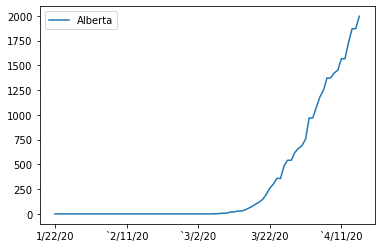

In [6]:
df.plot(y = 'Alberta') #Plots out a graph, similar to chi-csm.ca

In [7]:
#some more cleaning
di = list(df.index)

di2 = [i.replace('/20','').strip('`') for i in di]
df = df.rename(index = dict(zip(di,di2)))

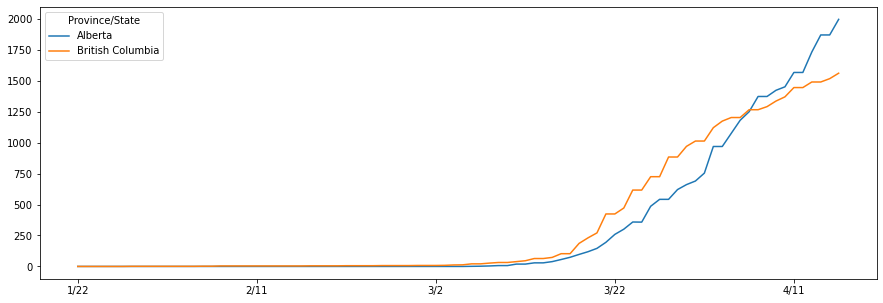

In [8]:
ax = df.plot(y=['Alberta', 'British Columbia'], figsize = (15,5), use_index = True)

<font size = "5">I promised some Machine Learning, so we should probably get started!</font>

In [9]:
#tweaking a few parameters to personalize the model to Alberta's cases
dates = df.index

zero_cases = []
alberta_cases = []

for i in df.index:
    if df.loc[i, 'Alberta'] == 0:
        zero_cases.append(i)
    
dates = dates.drop(zero_cases)

for i in dates:
    alberta_cases.append(df.loc[i, 'Alberta'])

In [10]:
#put them into numpy arrays for the model
days_since_first_case = np.array([i for i in range(len(dates))]).reshape(-1, 1)
alberta_cases = np.array(alberta_cases).reshape(-1, 1)

In [11]:
#more probably redundant cleaning
index = []
for i in range(len(alberta_cases)):
    if alberta_cases[i] == 0:
        index.append(i)
        
alberta_cases = np.delete(alberta_cases, index)

<font size = "5">Setting up a reasonable prediction. </font>

In [13]:
days_in_future = 10

future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

In [14]:
#This is for later
start = '3/6/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [15]:
#more tools
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [16]:
#training from data #look into how to these are splitted
x_train_confirmed, x_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_first_case, alberta_cases, test_size=0.15, shuffle=False)

<font size = "5">Support Vector Machine time!</font>

In [17]:
kernel = ['poly', 'sigmoid', 'rbf'] #type of hyperplane
c = [0.01, 0.1, 1, 10] #trade off between a smooth line and more accurate training points
gamma = [0.01, 0.1, 1] #the influence of a single training point
epsilon = [0.01, 0.1, 1] #how hard are errors penalized, and adjusted accordingly
shrinking = [True, False] #ignore certain elements in order to speed up optimization
svm_grid = {'kernel': kernel, 'C': c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking':shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv = 3, return_train_score = True, n_jobs = -1, n_iter = 40, verbose = 1)
svm_search.fit(x_train_confirmed, y_train_confirmed.ravel())

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   16.5s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [18]:
#parameter tuning
svm_search.best_params_

{'shrinking': False, 'kernel': 'poly', 'gamma': 0.01, 'epsilon': 0.01, 'C': 1}

In [19]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)

In [20]:
svm_confirmed

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

In [21]:
#the predicted data points from the SVM model!
svm_pred

array([  25.37345214,   25.41490848,   25.70510284,   26.49277326,
         28.02665775,   30.55549435,   34.32802108,   39.59297596,
         46.59909703,   55.59512231,   66.82978982,   80.5518376 ,
         97.01000366,  116.45302603,  139.12964275,  165.28859183,
        195.1786113 ,  229.04843918,  267.14681352,  309.72247232,
        357.02415362,  409.30059544,  466.80053581,  529.77271275,
        598.4658643 ,  673.12872847,  754.01004329,  841.35854679,
        935.422977  , 1036.45207194, 1144.69456963, 1260.39920811,
       1383.8147254 , 1515.18985952, 1654.77334851, 1802.81393038,
       1959.56034317, 2125.2613249 , 2300.16561359, 2484.52194727,
       2678.57906398, 2882.58570173, 3096.79059854, 3321.44249246,
       3556.7901215 , 3803.08222368, 4060.56753705, 4329.49479961,
       4610.1127494 , 4902.67012444, 5207.41566276, 5524.59810239])

MAE:  597.2125607166328
MSE:  389973.7241245328


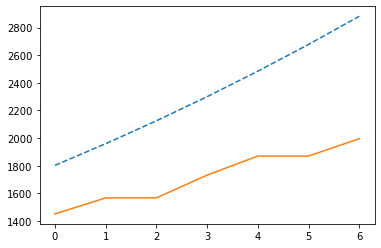

In [22]:
#looking at mean error
svm_test_pred = svm_confirmed.predict(x_test_confirmed)
plt.plot(svm_test_pred, linestyle = 'dashed')
plt.plot(y_test_confirmed)
print('MAE: ', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE: ', mean_squared_error(svm_test_pred, y_test_confirmed))

<font size = "5">Let's see the results!</font>

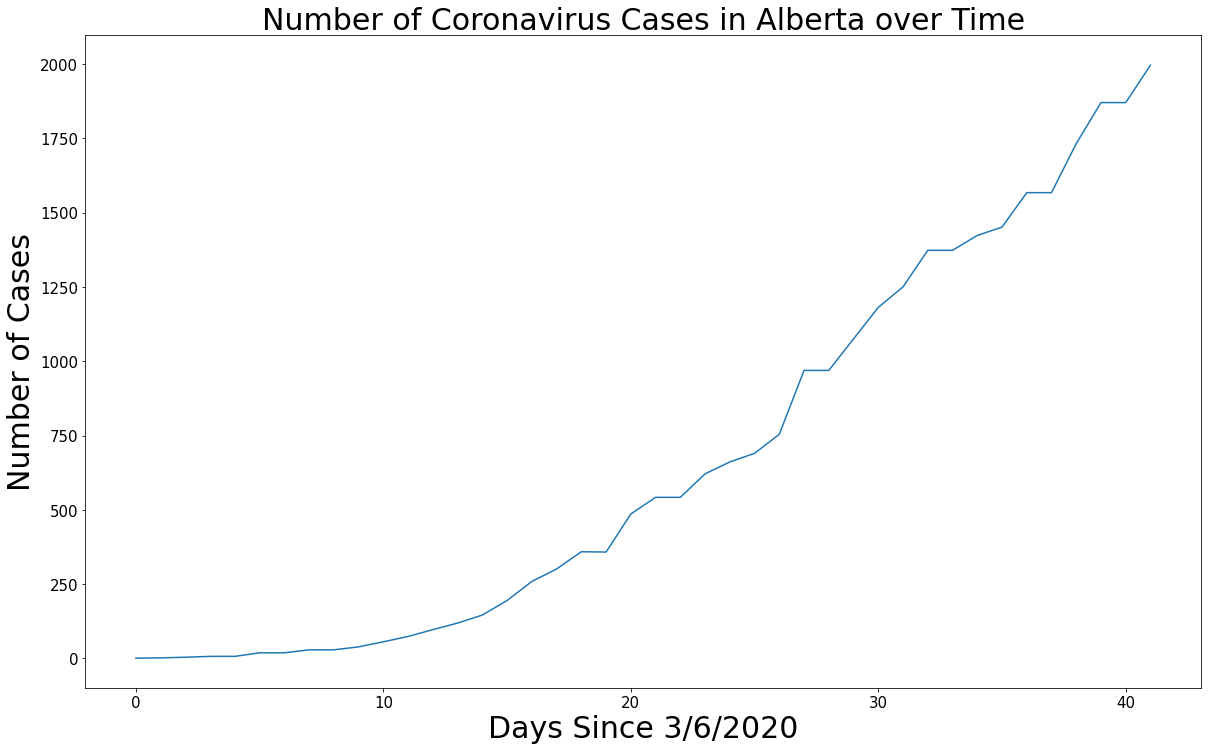

In [23]:
plt.figure(figsize = (20, 12))
plt.plot(adjusted_dates, alberta_cases)
plt.title('Number of Coronavirus Cases in Alberta over Time', size = 30)
plt.xlabel('Days Since 3/6/2020', size = 30)
plt.ylabel('Number of Cases', size = 30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

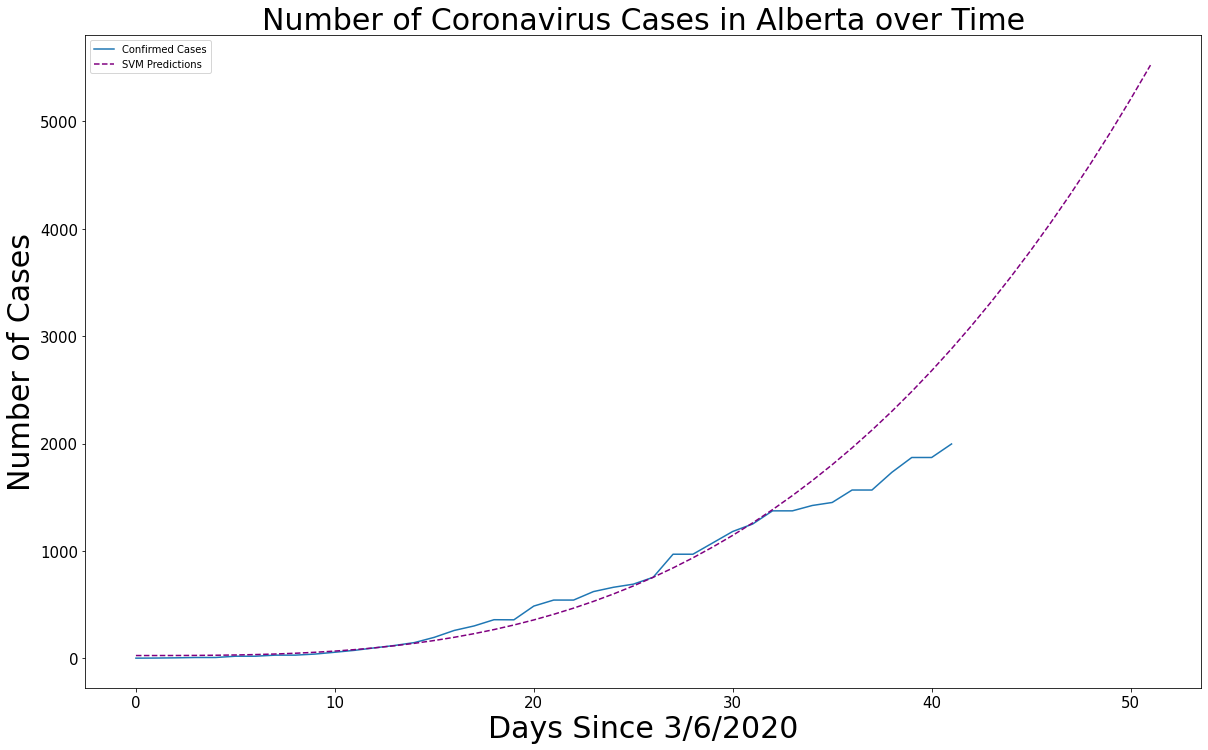

In [24]:
plt.figure(figsize = (20, 12))
plt.plot(adjusted_dates, alberta_cases)
plt.plot(future_forecast, svm_pred, linestyle = 'dashed', color = 'purple')
plt.title('Number of Coronavirus Cases in Alberta over Time', size = 30)
plt.xlabel('Days Since 3/6/2020', size = 30)
plt.ylabel('Number of Cases', size = 30)
plt.legend(['Confirmed Cases', 'SVM Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

<font size = "5">The results are in!</font>

In [25]:
print('SVM future predictions: ')
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

SVM future predictions: 


{('04/17/2020', 3096.790598544292),
 ('04/18/2020', 3321.442492459283),
 ('04/19/2020', 3556.790121497001),
 ('04/20/2020', 3803.0822236835634),
 ('04/21/2020', 4060.5675370450676),
 ('04/22/2020', 4329.494799607634),
 ('04/23/2020', 4610.112749397367),
 ('04/24/2020', 4902.670124440383),
 ('04/25/2020', 5207.415662762781),
 ('04/26/2020', 5524.59810239069)}